## The Schrödinger Cats Company 

In some near-future world, there is a company who have a quantum-data problem that needs solving. 

They have made a device that puts cats to sleep. It can also can wake them up again, since they are an ethical company, despite having a business that is about messing with the conciousness of cats.


In [90]:
import cirq
from cirq.contrib.svg import SVGCircuit

In [99]:
cat = cirq.GridQubit(0,0)

$|0\rangle$ means the cat is awake, $|1\rangle$ means the cat is asleep.

Using a qubit, starting in the state $|0\rangle$, a simple quantum circuit can be made which applies the identity matrix to the state:

$
I = \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
$

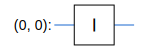

In [136]:
circuit = cirq.Circuit(cirq.I(cat))
SVGCircuit(circuit)

In [138]:
cirq.dirac_notation(cirq.Simulator().simulate(circuit).final_state)

'|0⟩'

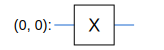

In [139]:
circuit = cirq.Circuit(cirq.X(cat))
SVGCircuit(circuit)

In [140]:
cirq.dirac_notation(cirq.Simulator().simulate(circuit).final_state)

'|1⟩'

A superposition state of $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle$ ) means the cat is both asleep and awake. Such a state can be controled via a quantum-gate operation $H$

In [106]:
cirq.dirac_notation(cirq.Simulator().simulate(cirq.Circuit([cirq.H(cat)])).final_state)

'0.71|0⟩ + 0.71|1⟩'

How much the cat is asleep and awake can also be controlled by quantum logic gates. For example, the cat can be put into a state that is 75% awake and 25% asleep:

In [135]:
result = cirq.Simulator().simulate(cirq.Circuit([cirq.H(cat)**(0.5)]))
final_state = result.final_state
print ('dirac notation: ', cirq.dirac_notation(final_state))
print ('numpy array: ',np.round(final_state,2))
print ('probability in state |0>: %.2f'%(np.vdot(final_state[0], final_state[0])))
print ('probability in state |1>: %.2f'%(np.vdot(final_state[1], final_state[1])))

dirac notation:  (0.85+0.15j)|0⟩ + (0.35-0.35j)|1⟩
numpy array:  [0.85+0.15j 0.35-0.35j]
probability in state |0>: 0.75
probability in state |1>: 0.25


Suppose there is now two cats:
* $|00\rangle$ means both cats are awake
* $|11\rangle$ means both cats are asleep.
* $|01\rangle$ means the first cat is awake, the second asleep
* $|10\rangle$ means the first cat is asleep, the second awake

In [117]:
cat_1 = cirq.GridQubit(0,0)
cat_2 = cirq.GridQubit(0,1)

cirq.dirac_notation(cirq.Simulator().simulate(cirq.Circuit([cirq.H(cat_1),cirq.H(cat_2)**0.5])).final_state)

'(0.6+0.1j)|00⟩ + (0.25-0.25j)|01⟩ + (0.6+0.1j)|10⟩ + (0.25-0.25j)|11⟩'

In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq


import numpy as np
import sympy as sp

import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=12)         
plt.rc('axes', titlesize=12)    
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('ytick', labelsize=12)   
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=12)  

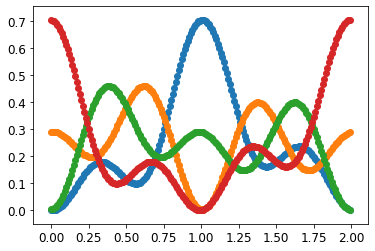

In [89]:
q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(0,1)

z0 = cirq.Z(q0)
z1 = cirq.Z(q1)

z00 = (((1+z0)/2)*((1+z1)/2) )
z01 = (((1+z0)/2)*((1-z1)/2) )
z10 = (((1-z0)/2)*((1+z1)/2) )
z11 = (((1-z0)/2)*((1-z1)/2) )

x_values = np.arange(0,2,0.01)
y_values = []
for x in x_values:
    circuit = cirq.Circuit([
                    cirq.X(q0)**(x),
                    cirq.X(q1)**(x*2),
                    #cirq.H(q0),
                    cirq.CX(q0,q1),
                    cirq.rx(2)(q0),
                    cirq.ry(-3)(q1)
                    ])

    result = cirq.Simulator().simulate(circuit)
    e00 = z00.expectation_from_state_vector(result.final_state_vector,{q0:0,q1:1}).real
    e01 = z01.expectation_from_state_vector(result.final_state_vector,{q0:0,q1:1}).real
    e10 = z10.expectation_from_state_vector(result.final_state_vector,{q0:0,q1:1}).real
    e11 = z11.expectation_from_state_vector(result.final_state_vector,{q0:0,q1:1}).real
    #print(cirq.dirac_notation(result.final_state_vector),e)

    y_values.append(np.array([e00,e01,e10,e11]))
    
    
y_values = np.array(y_values)
plt.scatter(x_values,y_values[0:,0]);
plt.scatter(x_values,y_values[0:,1]);
plt.scatter(x_values,y_values[0:,2]);
plt.scatter(x_values,y_values[0:,3]);  

In [78]:
circuit

(0, 0): ───X^-0.01───H───@───Rx(0.637π)────
                         │
(0, 1): ───X^-0.02───────X───Ry(-0.955π)───

In [37]:
q0 = cirq.GridQubit(0,0)
q1 = cirq.GridQubit(0,1)

circuit = cirq.Circuit([
                cirq.H(q0),
                cirq.CNOT(q0,q1),
                #cirq.XPowGate(exponent=sp.Symbol('x'))(q0),
                cirq.H(q1),
                cirq.X(q1) ** (sp.Symbol('a')),
                #cirq.XX(q0,q1) ** (sp.Symbol('b')),
                cirq.X(q0) ** (sp.Symbol('b')),
                ])
circuit

(0, 0): ───H───@───X^b─────────
               │
(0, 1): ───────X───H─────X^a───

In [38]:
z0 = cirq.Z(q0)
z1 = cirq.Z(q1)
x0 =  cirq.X(q0)
x1 =  cirq.X(q1)
z00 = (((1+z0)/2)*((1+z1)/2) )
#x00 = 
#x0 = cirq.XPow

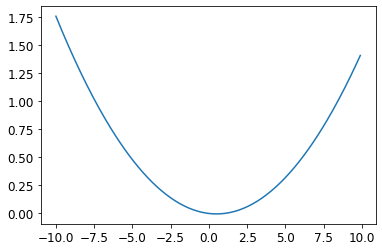

In [42]:
x_values = np.arange(-10,10,0.1)

a = 2
b = -3
    
outputs = tfq.layers.ControlledPQC( circuit,
                                    [ (cirq.Z(q0)*x + cirq.X(q1)*x*x) for x in x_values],
                                    repetitions=1000)

quantum_data = tfq.convert_to_tensor([cirq.Circuit()])
data = tf.convert_to_tensor([[a,b]], dtype=tf.float32)


res = outputs([quantum_data,data])
expectations = res.numpy()




plt.plot(x_values,expectations[0])
    #plt.scatter(x=x_values,y=expectations_Z00,label=f'a:{a}')

#plt.legend()
#plt.show();

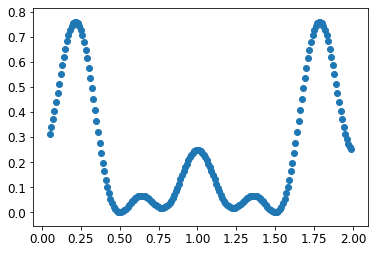

In [68]:
y_expectations = []
for j in x_values:
    resolver = cirq.ParamResolver({'a':2*j,'b':-3*j,'x':j})

    result = cirq.Simulator().simulate(cirq.resolve_parameters(circuit,resolver))
   
    e = z00.expectation_from_state_vector(result.final_state_vector,{q0:0,q1:1})
    #print(cirq.dirac_notation(result.final_state_vector),e)
    y_expectations.append(e)
    
plt.scatter(x_values,y_expectations)

In [69]:
len(x_values),len(y_expectations)

(195, 195)

Define a classical neutral network 

In [70]:
# The classical neural network layers.
nn_controller = tf.keras.Sequential([
        tf.keras.layers.Dense(10),#,activation='elu'),
        tf.keras.layers.Dense(3),
        tf.keras.layers.LeakyReLU(alpha=.001)
        #tf.keras.layers.ReLU(10),#1,max_value=10)
])



nn_controller(tf.constant([[1,2,-3],[4,-2,3]])).numpy()

array([[ 1.0612702 ,  0.41759366,  0.63472104],
       [-0.00188759,  0.39478713,  0.59225523]], dtype=float32)

In [71]:
# This input is the simulated miscalibration that the model will learn to correct.
input_circuits = tf.keras.Input(shape=(),
                                # The circuit-tensor has dtype `tf.string` 
                                dtype=tf.string,
                                name='input_circuits')


# single input for the unknown parameter
input_parameters = tf.keras.Input(shape=(3,),
                                #dtype=tf.dtypes.float32,
                                dtype=tf.dtypes.float32,
                                name='input_parameters')


In [72]:
dense_2 = nn_controller(input_parameters)
dense_2

<tf.Tensor 'sequential_3/leaky_re_lu_3/LeakyRelu_1:0' shape=(None, 3) dtype=float32>

In [73]:
expectation_layer = tfq.layers.ControlledPQC(circuit,
                                             z00,
                                             repetitions=1000)
expectation = expectation_layer([input_circuits, dense_2])
#expectation = expectation_layer([input_circuits, test])
expectation
                                             

<tf.Tensor 'controlled_pqc_7/sampled_expectation_7/IdentityN:0' shape=(None, 1) dtype=float32>

In [74]:
model = tf.keras.Model(inputs=[input_circuits, input_parameters],
                       outputs=expectation)
print (model.summary())

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_parameters (InputLayer)   [(None, 3)]          0                                            
__________________________________________________________________________________________________
input_circuits (InputLayer)     [(None,)]            0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 3)            73          input_parameters[0][0]           
__________________________________________________________________________________________________
controlled_pqc_7 (ControlledPQC (None, 1)            0           input_circuits[0][0]             
                                                                 sequential_3[0][0]    

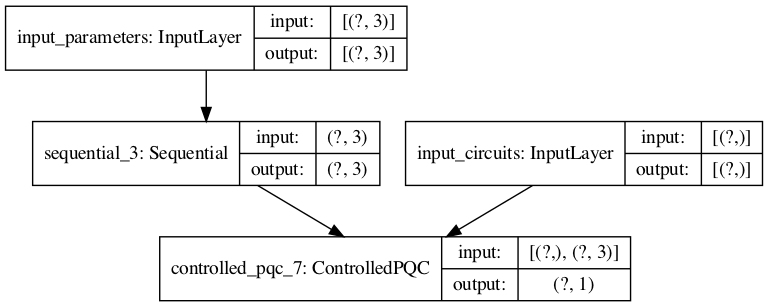

In [75]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [76]:
#quantum_data = tfq.convert_to_tensor([cirq.Circuit() for _ in x_values])
#data = tf.convert_to_tensor([[x,-3*x,2*x] for x in x_values], dtype=tf.float32)


# The command input values to the classical NN.
parameters = np.array([[x,2*x,-3*x] for x in x_values], dtype=np.float32)
#parameters = np.array([[1]], dtype=np.float32)

# The desired Z expectation value at output of quantum circuit.
#expected_outputs = np.array(expectations_Z00.tolist(), dtype=np.float32)
expected_outputs = np.array([y.real for y in y_expectations], dtype=np.float32)

In [77]:
expected_outputs.shape,parameters.shape

((195,), (195, 3))

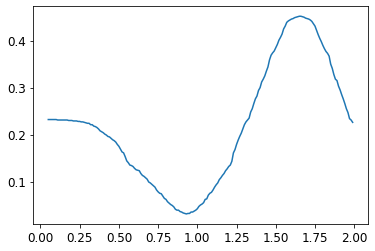

In [78]:
#parameters = tf.constant(1)#np.array([[1] for x in x_values], dtype=np.int64)


datapoint_circuits =  tfq.convert_to_tensor([
                                             cirq.Circuit()]*len(x_values))
                                             #cirq.resolve_parameters(circuit,cirq.ParamResolver({'x': x}))
                                             #for x in x_values])


#plt.plot(x_values,expected_outputs,label='expected')
#y_test = model([datapoint_circuits, parameters, fixed_inputs]).numpy()
y_test = model([datapoint_circuits, parameters]).numpy()
plt.plot(x_values,y_test,label='nn output')

plt.show();


In [79]:
x_values.shape

(195,)

In [80]:
expected_outputs.shape

(195,)

In [81]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x=[datapoint_circuits, parameters],
                    y=expected_outputs,
                    epochs=100,
                    
                    verbose=0)

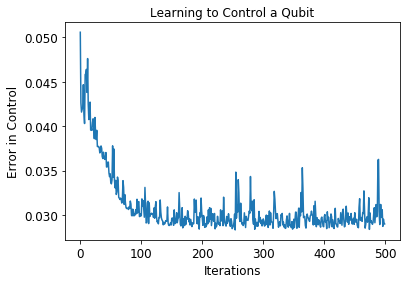

In [82]:
plt.plot(history.history['loss'])
plt.title("Learning to Control a Qubit")
plt.xlabel("Iterations")
plt.ylabel("Error in Control")
plt.show()

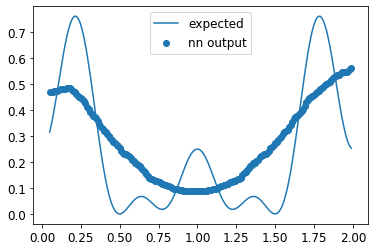

In [83]:
y_test = model([datapoint_circuits, parameters]).numpy()
plt.scatter(x_values,y_test,label='nn output')
plt.plot(x_values,expected_outputs,label='expected')
plt.legend()
plt.show();